###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2014 Wenjie Wu

# An Numerical solution for Time Delay PDE

My idea comes from my previous job in an old style glass manufactory. There was a large furnace lying in the middle of the factory. Originally, I want to check out he heat transfer and distribution inside the furnace. In according to Wang (1963), the product that has to be heat treaded was feed into the furnace, the temperature of the furnace was controlled by the heat controller which could be considered as the boundary conditions.  The following is the equation he used todescribe the working condition of the furnace. $$\frac{\partial u(t,x)}{\partial t} = k\frac{\partial^2 u(t,x)}{\partial x^2} +v(g(u(t-\tau_1)))\frac{\partial u(t,x)}{\partial x} +c(f(u(t -\tau _2))-u(t,x))$$Unfortunately, I cannot find more details about this equation, for it has been written about 60 years. But the equation itself is an interesting top until now, a time delay partial deferential equation(DPDE). So in my project, I want to talk about solving a specific nonlinear delay convection-reaction–diffusion equation in 1D and 2D. Let’s go. 
## 1D Problem
Firstly, we start with the easier 1D diffusion. Here comes the equation. $$\frac{\partial u(t,x)}{\partial t} = \alpha\frac{\partial^2 u(t,x)}{\partial x^2} +\beta\frac{\partial u(t,x)}{\partial x} +u(x,t)(1 -u(x,t-\tau))+f(t,x)),  (x,t)\in(0,T]$$where $f(x,t) = \alpha e^t cos(x)+\beta e^tsin(t)+e^{2t-\tau}sin^2(x), \alpha = \beta =1, a = 0, b = 1, T =2, s= 0.1$, initial and boundary condtions are determined by the exat solution $u(x,t)= e^tsin(x)$
### Discretization
we could use a forward-time, Center Difference scheme to discretize this second-order derivative as following:$$\frac{u_{i}^{n+1} - u_{i}^{n}}{\Delta t} =  \frac{u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}}{2\Delta x} - \frac{(u_{i+1}^{n}-u_{i}^{n})}{\Delta x} + u_{i}^{n}(1 - u_{i}^{n-s}) +f(x,t)$$now let's begin 

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams, cm
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14

Initial conditions setting, don’t forget the stability constraint:$\frac{\Delta t}{\Delta x^2}\leqslant \frac{1}{2}$

In [2]:
#initial conditions 
nt,nx,s,T = 1001,51,0.1,2
L = numpy.pi
dx = L/(nx-1)
dt = T/(nt-1)
x = numpy.linspace(0, L, nx)
u = numpy.zeros(nx)
u0 = numpy.sin(x)                  #IC, when t goes to 0

Before solving the whole function, we define the f(x,t) function which will applied into the main function first.

In [3]:
def fxt(x,t):
    """solves the solution for f(x,t)
    Parameters:
    ----------
    x:array of float, the position 
    t:float, time
    Returns:
    -------
    fxt: array of float, the solution for f(x,t)
    """
    fxt = numpy.exp(t) * numpy.cos(x) + \
          numpy.exp(t) * numpy.sin(t) + \
          numpy.exp(2*t - s) * numpy.sin(x)**2         
    return fxt

Here we got a time delay term $u_{i}^{n}(1 - u_{i}^{n-s})$, which will use the previous solution. what I have done is to establish an n+1 matrix to storage the solution of u at every time step. 

In [4]:

def func_u(u, x, nt, dt, dx,s):
    """solves the DPDE with forward time center difference scheme
    Parameters:
    ----------
    u: array of float, intiial condition of u
    x: array of float, position
    nt: int, number of time step
    dt: float, time increment
    dx: float, delta x
    s: float, time delay 
    Returns:
    -------
    u: array of float, solutions for the DPDE
    err_av: array of float, norm of error
    err_max: array of float, the max value of error in each step
    """
    un = numpy.zeros_like(u)
    u_exact = numpy.zeros_like(u)
    err_av = numpy.zeros(nt+1)
    err_max =numpy.zeros(nt+1)
    unt = numpy.zeros((nt+1,nx))
    i = 0
    for n in range(nt):
        tn = i-int(s/dt)
        un = u.copy()
        u[1:-1] = un[1:-1] + \
                  dt/dx**2*(un[2:] - 2*un[1:-1] + un[0:-2]) -\
                  dt/dx*(un[2:] - un[1:-1]) + \
                  dt*un[1:-1] * (1-unt[tn,1:-1]) + dt*fxt(x,dt*i)[1:-1]                       
        u[0] = 0                                                                    #BC
        u[-1] = numpy.exp(dt*i)*numpy.sin(L)                                        #BC
        unt[i,:] = u[:]                                                             #update time delay term for the futher use
        i = i + 1
        u_exact = numpy.exp(dt*i)*numpy.sin(x)                                      #exact solution for the function
        
        err_av[i] = numpy.sqrt(numpy.sum((u - u_exact)**2)/numpy.sum(u_exact**2))   #norm of error
        err_max[i] = numpy.max(numpy.abs(u-u_exact))                                #max error in per time step 
    return u, err_av, err_max

In [5]:
u_num = func_u(u0.copy(), x, nt, dt, dx,s)[0]             #numerical value for u
err_average = func_u(u0.copy(), x, nt, dt, dx,s)[1]       #norm of error
err_max = func_u(u0.copy(), x, nt, dt, dx,s)[2]           #greatest error in every time step

### Calculate the error
Now we have the solution of u at every step and want to know the error between the exat solution. let's check the error change first.

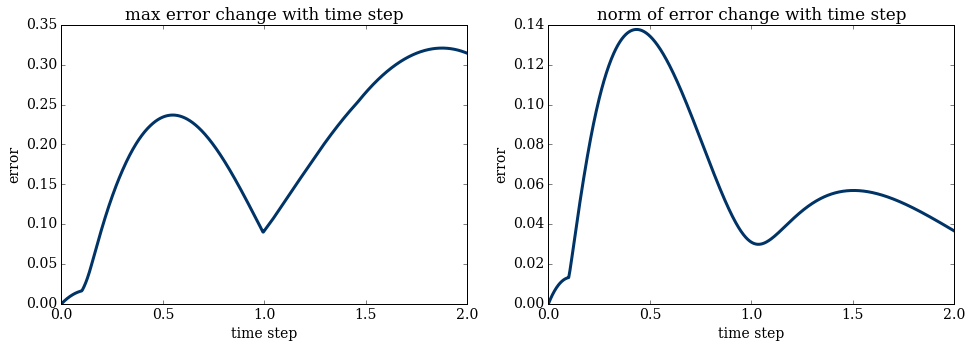

In [6]:
pyplot.figure(figsize=(16,5))
pyplot.subplot(121)
pyplot.plot(numpy.linspace(0,T,nt+1), err_max, color='#003366', ls='-', lw=3)
pyplot.title('max error change with time step')
pyplot.xlabel('time step')
pyplot.ylabel('error');
pyplot.subplot(122)
pyplot.plot(numpy.linspace(0,T,nt+1), err_average, color='#003366', ls='-', lw=3)
pyplot.title('norm of error change with time step')
pyplot.xlabel('time step')
pyplot.ylabel('error');

The following is the animation for numerical versus exact in every time step. Click [here](./num_vs_exact.ipynb) for more information about the animation

In [7]:
%%HTML
<video controls>
  <source src="./num_vs_exact.mp4" type="video/mp4">
</video>

From the animation we can check out that there is more error in the beginning, that’s meanly because there is no value for the time delay term $u^{n-s}_i$, when the time step goes, when the time delay term has the value, the solution gets more accurate.But the error changes periodically due to the time delay, More time step more acurate.

## 2D problem
Let’s move to 2D part, in 2D, the equation becomes to $$\frac{\partial u}{\partial t} = \alpha \nabla^2 u +\beta\nabla u +u(x,y,t)(1 -u(x,y,t-\tau))+f(t,x,y))$$Here we simpily use the ICs in the 1D problem again, $f(t,x,y)$ becomes to $f(x,y,t) = \alpha e^t (cos(x) +cos(y))+2\beta e^tsin(t)+e^{2t-\tau}(sin^2(x) + sin^2(y))$

In [8]:
#setup ICs
L = numpy.pi
H = numpy.pi
nx,ny,nt,s,T = 31,31,1001,0.1,2
dx = L/(nx-1)
dy = H/(ny-1)
dt = T/(nt-1)
x = numpy.linspace(0,L,nx)
y = numpy.linspace(0,H,ny)
u = numpy.zeros((ny, nx))
#set initila condition for u0
u1 = numpy.zeros_like(u)
u2 = numpy.zeros_like(u)
for n in range(ny):
    u1[n:] = numpy.sin(y)
for n in range(nx):
    u2[:,n] = numpy.sin(x)
u0 = u1 + u2

generate he solution of function $f(x,y,t)$ and put them into $n \times n$ matrix which will be used in the main function

In [9]:
def ft_2d(x,y,t):
    """generate a nxn matrix with x and y
    Parameters:
    ----------
    x: array of float, x positon 
    y: array of float, y position
    t: float, time
    Returns:
    -------
    ft: matrix of float, generate a matrix with x and y
    """
    ft = numpy.zeros_like(u)
    fty = numpy.zeros_like(u)
    ftx = numpy.zeros_like(u)
    ft1 = fxt(x,t)
    ft2 = fxt(y,t)
    for n in range(ny):
        fty[n,:] = ft2               #every line equal to ft2
    for n in range(nx):
        ftx[:,n] = ft1               #every column equal to ft1
    ft = ftx + fty
    return ft

Just like 1D, we add a n+1 matrix to storge the value of u at every time step, set the top bottom and right boundary condition as Neumann boundary, which is $\frac{\partial u}{\partial x} = q(x) = 0$ 

In [10]:
def func_u_2d(u, x, y, nt, dt, dx, dy, s):
    """solves the DPDE with forward time center difference scheme
    Parameters:
    ----------
    u: array of float, intiial condition of u
    x: array of float, position
    y: array of float, position  
    nt: int, number of time step
    dt: float, time increment
    dx: float, delta x
    dy: float, delta y
    s: float, time delay
    Returns:
    -------
    u: array of float, solutions for the DPDE
    """
    un = numpy.zeros_like(u)
    unt = numpy.zeros((nt+1,ny,nx))
    i = 0
    for n in range(nt):
        tn = i-int(s/dt)
        un = u.copy()
        u[1:-1,1:-1] = un[1:-1,1:-1] + \
                       dt/dy**2*(un[2:,1:-1] - 2*un[1:-1,1:-1] + un[0:-2,1:-1]) +\
                       dt/dx**2*(un[1:-1,2:] - 2*un[1:-1,1:-1] + un[1:-1,0:-2]) -\
                       dt/dy*(un[2:,1:-1] - un[1:-1,1:-1]) - \
                       dt/dx*(un[1:-1,2:] - un[1:-1,1:-1]) + \
                        dt*ft_2d(x,y,dt*i)[1:-1,1:-1] + dt*un[1:-1,1:-1] * (1-unt[tn,1:-1,1:-1])                      
        #BCs
        u[-1,:] = u[-2,:]             #top
        #u[0,1:-1] =                  #bottom
        u[:,0] = u[:,1]               #left
        u[:,-1] = u[:,-2]             #right
        unt[i,:,:] = u[:,:]           #update time delay term for the futher use
        i = i + 1
    return u

In [11]:
U = func_u_2d(u0.copy(), x, y, nt, dt, dx, dy, s)

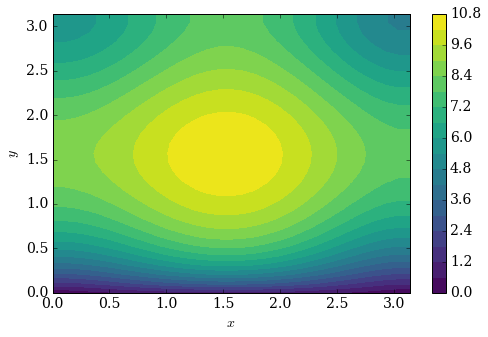

In [12]:
pyplot.figure(figsize=(8,5))
pyplot.contourf(x,y,U,20,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();

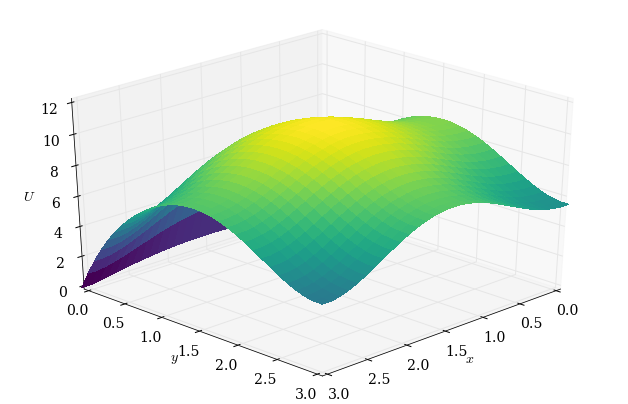

In [13]:
fig = pyplot.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
X,Y = numpy.meshgrid(x,y)
surf = ax.plot_surface(X,Y,U[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
ax.set_xlim(0,3)
ax.set_ylim(0,3)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$U$')
ax.view_init(30,45)

## Discussion 
Though I get some solutions for 1D and 2D DPDE, there still more works to do in 2D error and convergence. Also, it seems forward time center difference scheme is not that accurate in solving these kind of problems. The max error reaches 0.3 which is not an acceptable result, but the norm of error is 0.04 after 1 sec, if we have more time steps, it will be more acurate. Next time I will try to use Liu’s (2013) method to see if I can get a precise answer.  

## References
* Abhishek Das, Srinivasan Natesan, [Uniformly convergent hybrid numerical scheme for singularly perturbed delay parabolic convection–diffusion problems on Shishkin mesh](http://www.sciencedirect.com/science/article/pii/S0096300315012187)

* Bochao Liu, Chengjian Zhang,[A spectral Galerkin method for nonlinear delay convection–diffusion–reaction equations](http://www.sciencedirect.com/science/article/pii/S1007570413002207)

* Lorena A. Barba,Ian Hawke,Bernard Knaepen, [Practical Numerical Methods with Python](https://github.com/numerical-mooc/numerical-mooc)

* P.K.C. Wang, Asymptotic stability of a time-delayed diffusion system, J. Appl. Mech. 30 (1963) 500–504.

* Vladimir Pimenov1 and Andrey Lozhnikov1,2, [Numerical Methods for Evolutionary Equations with Delay and Software Package PDDE](https://www.researchgate.net/publication/266862028_Numerical_Methods_for_Evolutionary_Equations_with_Delay_and_Software_Package_PDDE)

* Wu, J.Theory and Applications of Partial Functional Differential Equations, Springer-Verlag New York, Inc. 1996.


